In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import scipy.stats as stats
import hypothesis_tests1 as ht

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("final_df-Copy1.csv",index_col=0)
df.head()

,Player,FG%,3P%,2P%,FT%,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,POS,height,weight
0,A.C. Green,0.442,0.062,0.448,0.675,1.890,3.722,5.615,0.865,0.633,0.202,0.602,1.572,5.440,PF,203.0,106.0
1,A.J. Guyton,0.384,0.382,0.381,0.824,0.285,0.750,1.035,1.870,0.245,0.155,0.775,0.785,5.710,PG,208.0,99.0
2,A.J. Hammons,0.405,0.500,0.375,0.450,0.360,1.270,1.640,0.180,0.050,0.590,0.450,0.950,2.180,C,198.0,99.0
3,A.J. Price,0.373,0.273,0.447,0.632,0.251,1.093,1.344,1.971,0.401,0.021,0.753,0.735,5.578,PG,213.0,124.0
4,Aaron Brooks,0.410,0.359,0.444,0.838,0.403,1.268,1.671,3.174,0.591,0.134,1.582,1.932,9.604,PG,183.0,73.0


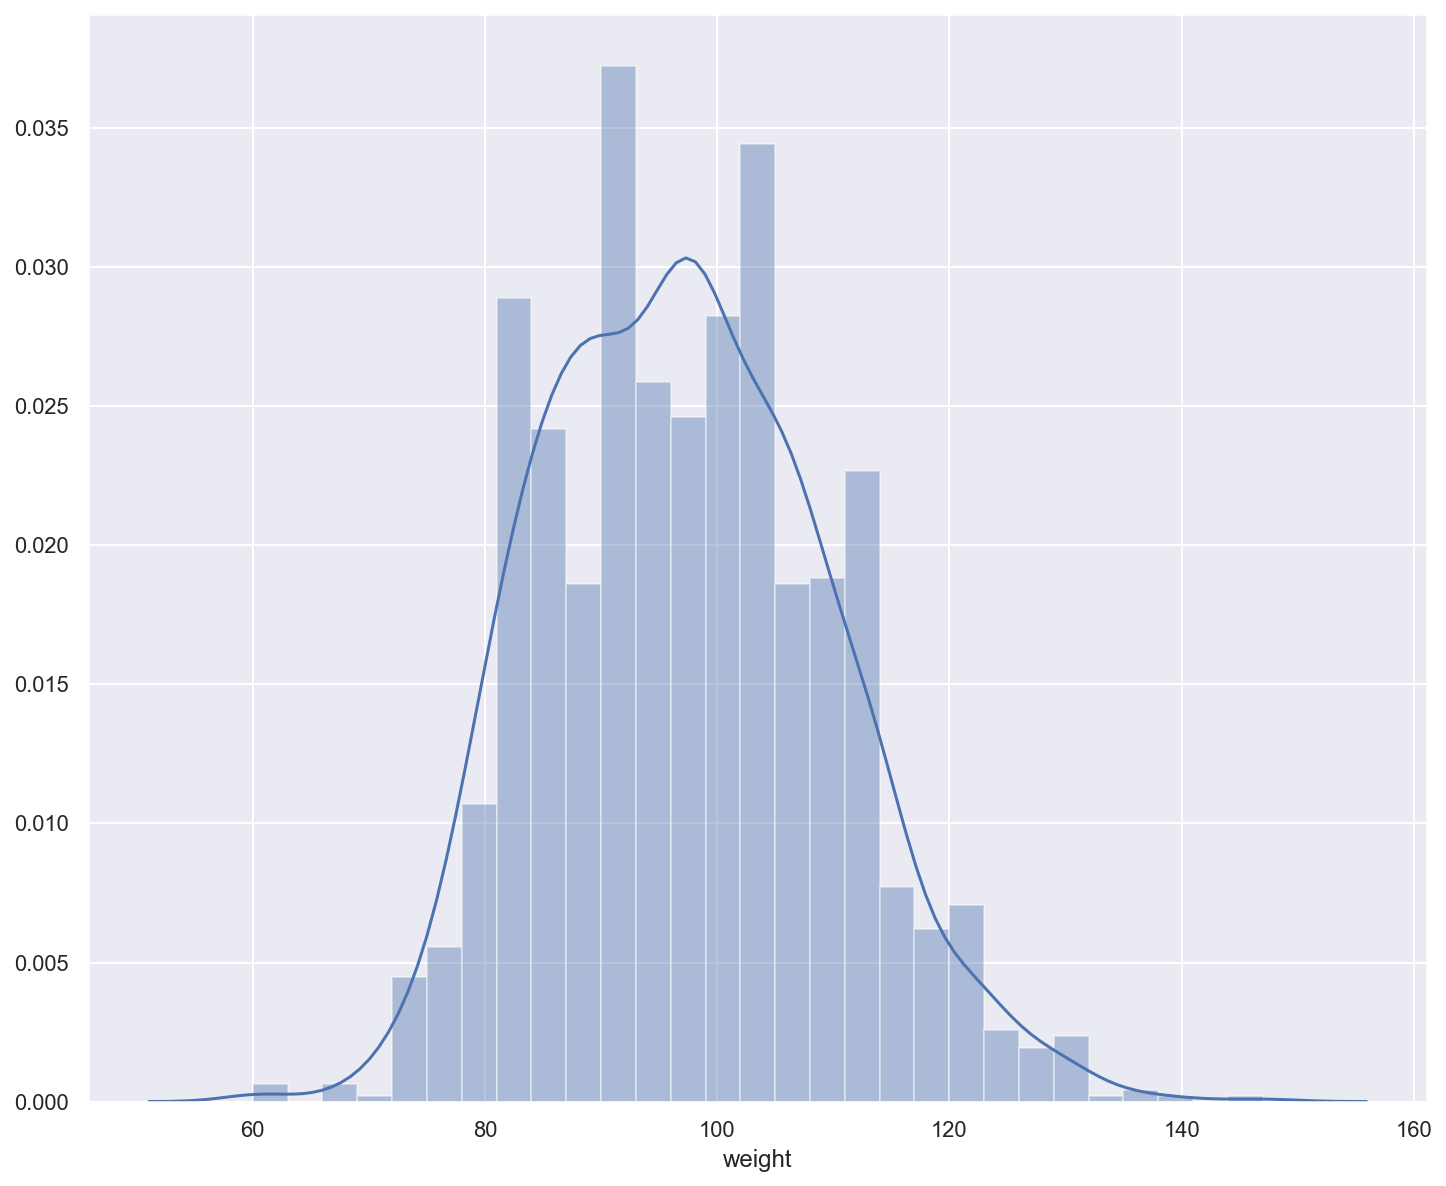

In [16]:
#explore data
sns.distplot(df.weight)

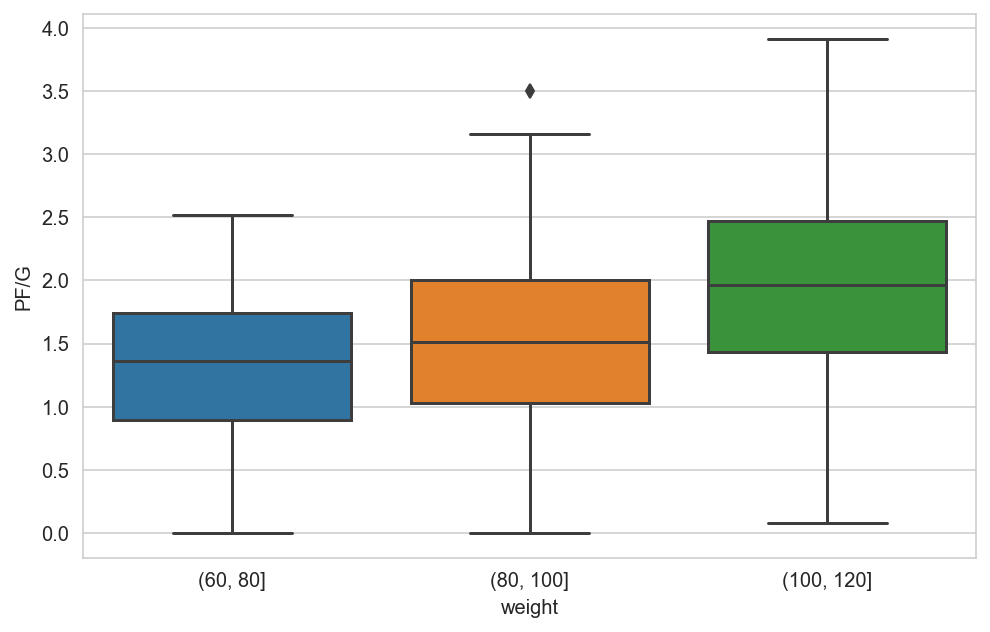

In [4]:
weight = pd.cut(df.weight, range(60, 140, 20))
fauls = df["PF/G"]

#Explore the data to see if there is a visible difference between the values so we can set our hypothesis.
ht.Two_Sample_Test.explore_data(weight, fauls)



In [5]:
skinny_players = df.loc[df['weight'] < 95]
heavy_players = df.loc[df['weight'] > 95]

sk_pl_w = skinny_players.weight
sk_pl_fauls = round(skinny_players['PF/G'],3)

heavy_pl_w = heavy_players.weight
heavy_pl_fauls = round(heavy_players['PF/G'],3)

print(len(skinny_players))
print(len(heavy_players))

646
824


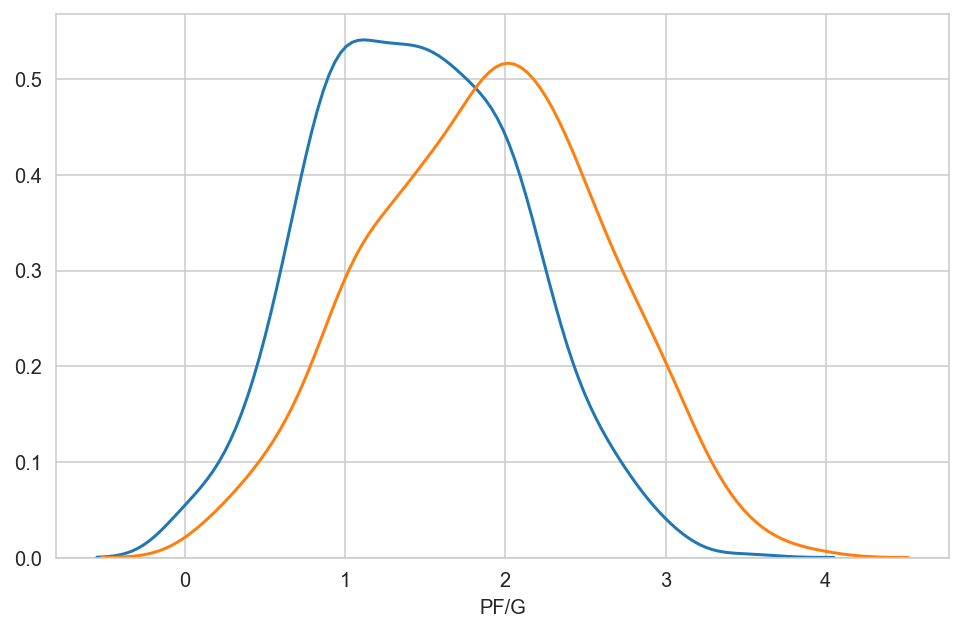

In [6]:
ht.Two_Sample_Test.overlapping_visual(sk_pl_fauls, heavy_pl_fauls)

## Visualizations of Sample Distributions

We will create sample distributions from fauls of both skinny players and heavy players

In [8]:
print(stats.normaltest(heavy_pl_fauls))
print(stats.normaltest(sk_pl_fauls))

NormaltestResult(statistic=11.140600949995745, pvalue=0.0038093356504899745)
NormaltestResult(statistic=7.448750394960391, pvalue=0.024128171060318462)


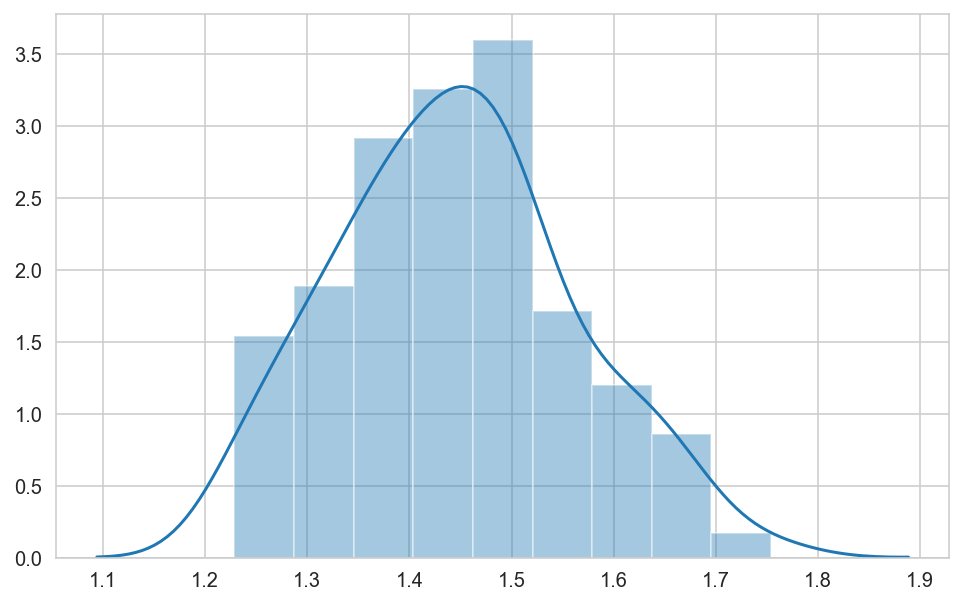

NormaltestResult(statistic=1.4505033278488049, pvalue=0.48420269726965126)


In [9]:
ht.Two_Sample_Test.visualize_sample_dist(skinny_dist)

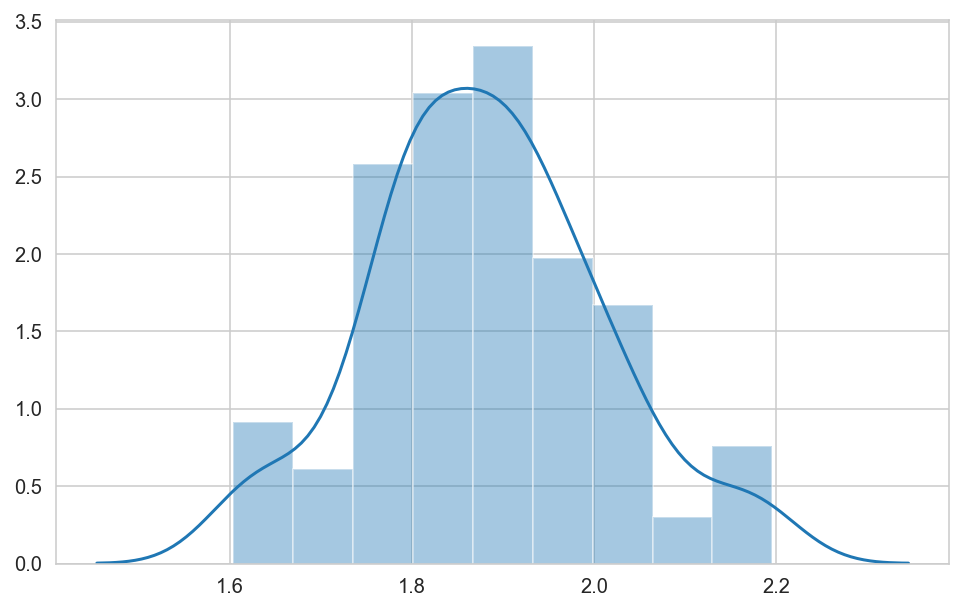

NormaltestResult(statistic=0.9042131589219023, pvalue=0.6362863510548065)


In [10]:
ht.Two_Sample_Test.visualize_sample_dist(heavy_dist)

In [18]:
#Taking sample distributions via Central Limit Theorem
dist_size = 100
skinny_dist = ht.CLT.create_sample_distribution(sk_pl_fauls,dist_size, n=30)
heavy_dist = ht.CLT.create_sample_distribution(heavy_pl_fauls,dist_size, n=30)

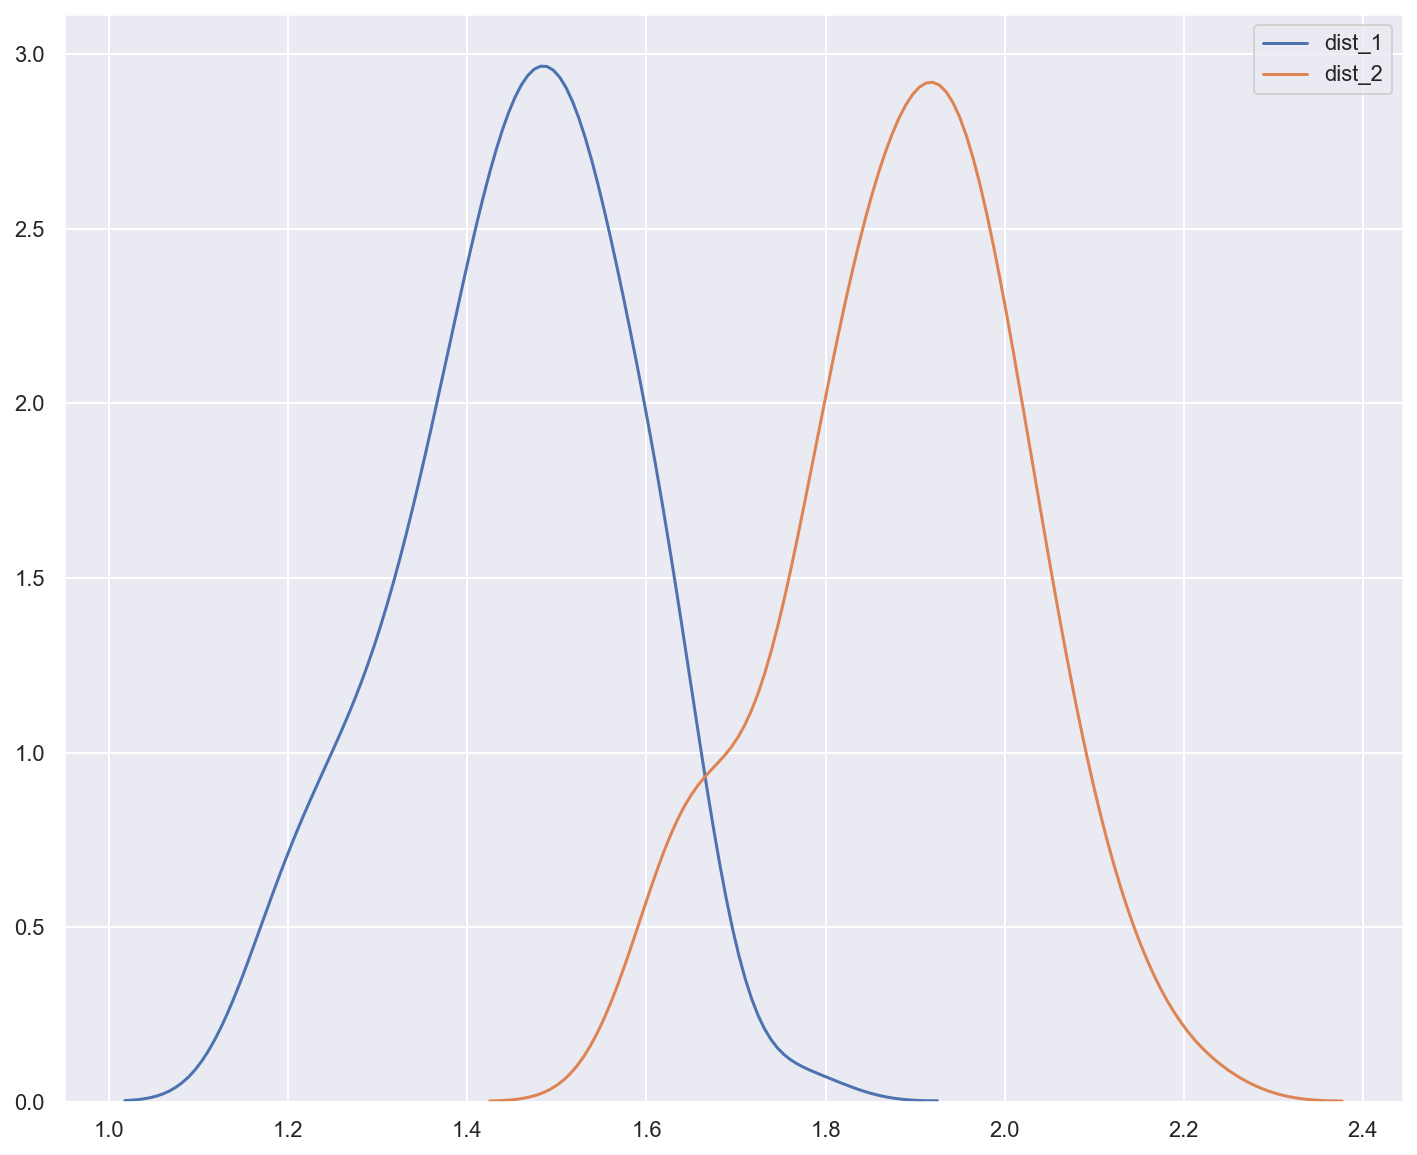

In [19]:
# Create a plot showing overlapping of distribution means and sds for inspection
ht.Two_Sample_Test.visualize_dist(skinny_dist, heavy_dist)

1) Set up null and alternative hypotheses   
2) Choose a significance level   
3) Calculate the test statistic   
4) Determine the critical or p-value (find the rejection region)   
5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis 

## The Null Hypothesis

>**$H_{0}$: 2. On average, heavy players' fauls percentage equals to the skinny players' faul percentage. i.e. $\mu_{0} = \mu_{1}$**

## The Alternate Hypothesis

In this example, the alternative hypothesis is that there is in fact a mean difference in fauls percentage between the heavy and skinny players.

>**$H_{1}$ (2-tailed): The parameter of interest, our mean difference between heavy players' fauls percentage and skinny players' fauls percentage, is different than zero.**

>**$H_{1}$ (1-tailed, >): The mean difference between heavy players' fauls percentage and skinny players' fauls percentage is greater than zero.**

>**$H_{1}$ (1-tailed, <): The mean difference between heavy players' fauls percentage and skinny players' fauls percentage is less than zero.**

NOTE: The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the parameter of the overall population. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an inference about this population parameter.

Now, calculate the mean difference between both groups.

In [12]:
mean_diff = round(np.mean(heavy_dist) - np.mean(skinny_dist), 3)

n_heavy = len(heavy_dist)
n_skinny = len(skinny_dist)

dof = (n_heavy + n_skinny - 2)
alpha = 0.5

t_crit = ht.Two_Sample_Test.t_crit(alpha, dof)
t_crit

0.6757308423854822

In [13]:
result  = ht.Two_Sample_Test.t_test(heavy_dist, skinny_dist)
print(result)
t_stat = result[0]
p_value = result[1]

Ttest_indResult(statistic=25.382497476338536, pvalue=3.636618193981533e-64)


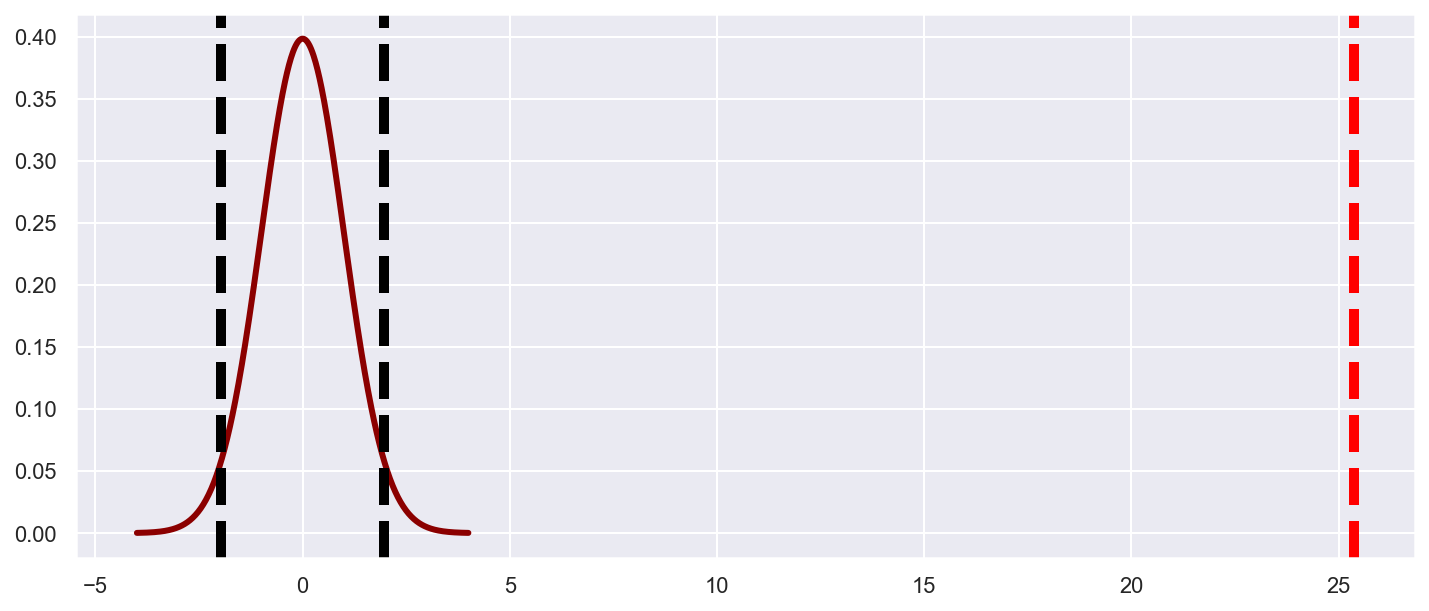

In [14]:
ht.Two_Sample_Test.visualize_t(t_stat, n_heavy, n_skinny)

In [15]:
ht.Two_Sample_Test.conclusion(result, t_crit, alpha)

Null hypothesis rejected. H1 is accepted. Results are statistically significant with t-value = 25.38 critical t-value = 0.6757308423854822 and p-value = 0.0
